                                         Food Hamper Demand Project

**
**Problem** - To predict number of hampers needed and in which
 particular geographical area, and if need of hampers relate with holidays

                                           Group - 1

                    Lovepreet Kaur, Bandhandeep Singh, Rajveer Kaur, Harshdeep Singh, Alvin Mathew


In [744]:
#importing panadas and numpy
import pandas as pd
import numpy as np

In [745]:
# reading files using panadas
fact = pd.read_csv('/content/Food Hampers Fact.csv')
client = pd.read_csv('/content/Clients Data Dimension1.csv')

<ipython-input-745-84d8193aa13f>:2: DtypeWarning: Columns (11,30) have mixed types. Specify dtype option on import or set low_memory=False.
  fact = pd.read_csv('/content/Food Hampers Fact.csv')
<ipython-input-745-84d8193aa13f>:3: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  client = pd.read_csv('/content/Clients Data Dimension1.csv')


**Step 1**

At First we clean dataset after loading

In [746]:
#checking the shape of the dataset
fact.shape

(16605, 39)

In [747]:
# checking the shape of other dataset
client.shape

(25505, 44)

In [748]:
#checking the missing values
fact.isnull().sum()

,0
agent_collect,9580
agent_collect_note,11039
agent_related,0
appointment_contact,16605
appointment_participants,4292
appointment_type,0
cal_color,9580
client_collected,7648
client_list,119
collect_scheduled_date,3


In [749]:
#checking the missing values
client.isnull().sum()

,0
address,18241
address_complement,25011
address_text,19130
age,423
bio,25500
birthdates,417
client_status_more_info,25446
communication_barrier,25504
contact_frequency,25303
date_reopened,12370


In [750]:
# making the copy of datasets for cleaning
fact_clean = fact.copy()
client_clean = client.copy()

In [751]:
#removing columns that we don't need
column_to_drop = ['Slug','timezone','where','staff_invited','organization','hamper_type','meeting_link','id_xano','g_event_link','g_event_id','details','confirmed','appointment_contact','agent_collect','agent_collect_note','datetime_to','agent_related','appointment_participants','appointment_type','cal_color','client_collected','client_list','collect_scheduled_date','collect_token','contact_method','hamper_confirmation_type','marked_off','qrcode','related_scheduler','title','Creation Date','Modified Date','Creator']
fact_clean.drop(columns=column_to_drop,inplace=True)

In [752]:
# removing the duplicates from datasets
fact_clean.drop_duplicates(inplace=True)

In [753]:
client_clean.drop_duplicates(inplace=True)

In [754]:
# dropping columns from client dataset that we don't need
columns_to_drop = ['worker','Slug','referral_organizations_allowed','household','family','urgent_goal','primary_birthdate','preferred_languages','organization','preferred_contact_method-old-old','date_reopened','picture','pets','organization_signature','id_xano','emergency_phone_number','emergency_contact_name','contact_frequency','communication_barrier','client_status_more_info','bio','address_complement','external_id','address_text','zz_address_txt','latest_language_code','english_proficiency_level','latest_contact_method','podio_created_on','primary_client_key','primary_contact','status_update','preferred_contact_methods','Creation Date','Modified Date','Creator','sex']
client_clean.drop(columns= columns_to_drop,inplace=True)

In [755]:
# checking the datatype of features in dataset
fact_clean.dtypes

,0
datetime_from,object
pickup_date,object
pickup_location,object
quantity,int64
unique_client,object
unique id,object


In [756]:
# checking datatypes
client_clean.dtypes

,0
address,object
age,float64
birthdates,object
dependents_qty,float64
sex_new,object
status,object
unique id,object


In [757]:
# generating  descriptive statistics
fact_clean.describe()

,quantity
count,16605.000000
mean,1.000120
std,0.010974
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [758]:
# generating  descriptive statistics
client_clean.describe()

,age,dependents_qty
count,25082.000000,20591.000000
mean,26.771031,4.737507
std,17.535251,2.393636
min,-76.000000,0.000000
25%,12.000000,3.000000
50%,22.000000,5.000000
75%,40.000000,6.000000
max,123.000000,18.000000


In [759]:
# importing liberaries that we need to make charts and visuals
import matplotlib.pyplot as plt
import seaborn as sns

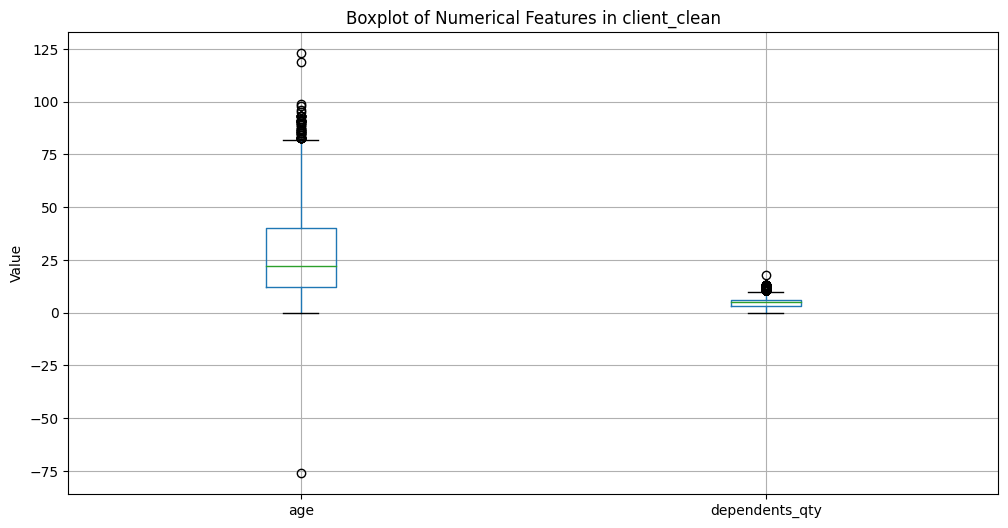

In [760]:
# Create a boxplot for all numerical columns
client_clean.boxplot(figsize=(12, 6))
plt.title('Boxplot of Numerical Features in client_clean')
plt.ylabel('Value')
plt.show()

In [761]:
fact_clean.head()

,datetime_from,pickup_date,pickup_location,quantity,unique_client,unique id
0,"Jul 27, 2023 00:00",NaN,1689345971878x737827531391241900,1,NaN,1690484251501x480105574053396160
1,"Aug 26, 2023 00:00",NaN,1689345971878x737827531391241900,1,NaN,1690484266053x272870528999898500
2,"Sep 25, 2023 00:00",NaN,1689345971878x737827531391241900,1,NaN,1690484268062x404921931938873500
3,"Oct 25, 2023 00:00",NaN,1689345971878x737827531391241900,1,NaN,1690484269673x683706627103465300
4,"Nov 24, 2023 00:00",NaN,1689345971878x737827531391241900,1,NaN,1690484271378x480307445517271800


In [762]:
client_clean.head()

,address,age,birthdates,dependents_qty,sex_new,status,unique id
0,NaN,NaN,NaN,1.0,NaN,Active,1663970867191x215057012520910850
1,NaN,NaN,NaN,1.0,NaN,Active,1663970977536x320239406776320000
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,1.0,Male,Active,1667327243288x887165737992192000
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,1.0,Female,Active,1667833948363x769349711194751000
4,NaN,NaN,NaN,1.0,Male,Active,1667834247644x935054501347328000


In [763]:
# Handling missing values in numeric features
# Convert birthdates to datetime format
client_clean['birthdates'] = pd.to_datetime(client_clean['birthdates'], errors='coerce')

# Fill missing age values using birthdates (assuming the current year is 2023)
client_clean['age'] = client_clean['age'].fillna(client_clean['birthdates'].apply(lambda x: 2023 - x.year if pd.notnull(x) else None))


# Remove the 'birthdates' column
client_clean = client_clean.drop(columns=['birthdates'])


median_age = client_clean['age'].median()
client_clean['age'] = client_clean['age'].fillna(median_age)



# Calculate the mode (most frequent value) of 'sex_new'
mode_sex_new = client_clean['sex_new'].mode()[0]

# Fill missing values in 'sex_new' with the mode
client_clean['sex_new'] = client_clean['sex_new'].fillna(mode_sex_new)

# Verify that the missing values in 'sex_new' have been filled
missing_sex_new_after_fill = client_clean['sex_new'].isnull().sum()
missing_age_after_fill = client_clean['age'].isnull().sum()
# Output the result

print(f"Remaining missing values in 'age': {missing_age_after_fill}")
print(f"Remaining missing values in 'sex_new': {missing_sex_new_after_fill}")

Remaining missing values in 'age': 0
Remaining missing values in 'sex_new': 0


In [764]:
client_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         7264 non-null   object 
 1   age             25505 non-null  float64
 2   dependents_qty  20591 non-null  float64
 3   sex_new         25505 non-null  object 
 4   status          25505 non-null  object 
 5   unique id       25505 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [765]:
fact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime_from    16604 non-null  object
 1   pickup_date      7025 non-null   object
 2   pickup_location  16605 non-null  object
 3   quantity         16605 non-null  int64 
 4   unique_client    16486 non-null  object
 5   unique id        16605 non-null  object
dtypes: int64(1), object(5)
memory usage: 778.5+ KB


In [766]:
# cleaning gender cloumn
client_clean['sex_new'] = client_clean['sex_new'].replace([' Female'], 'Female')


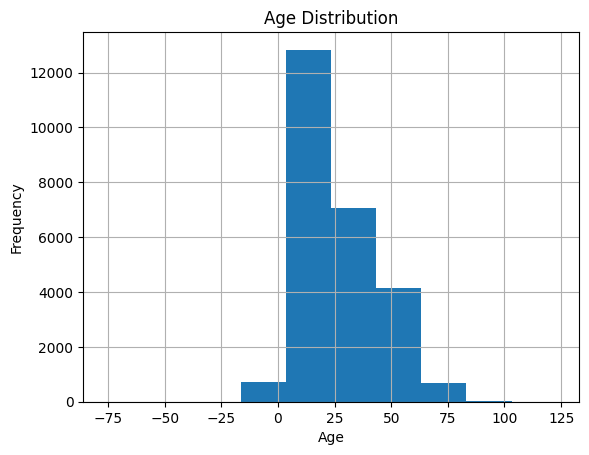

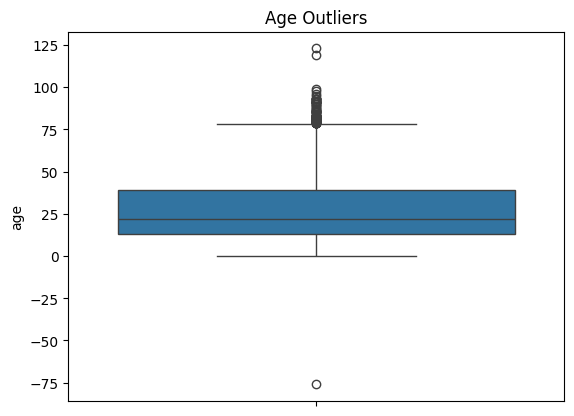

In [767]:
# visualizing the data

# Histograms for numerical columns
client_clean['age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# # Count plot for categorical columns
# sns.countplot(data=client_clean, x='preferred_languages')
# plt.title('Preferred Languages Distribution')
# plt.show()

# Boxplot for numerical columns to identify outliers
sns.boxplot(data=client_clean, y='age')
plt.title('Age Outliers')
plt.show()


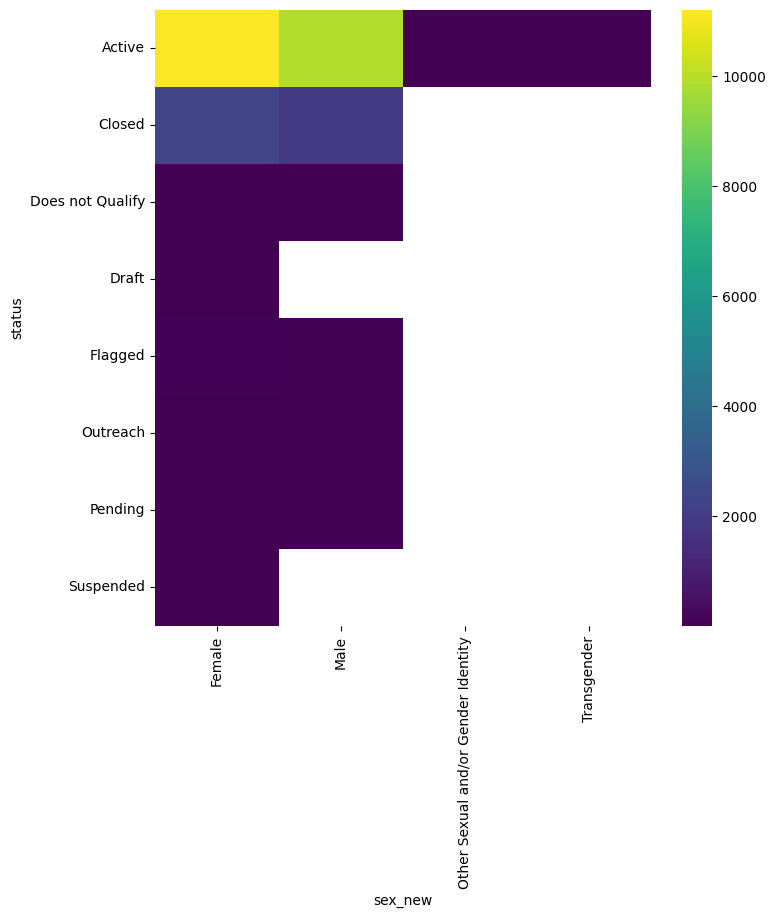

In [768]:
# @title sex_new vs status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in client_clean.groupby('sex_new')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex_new')
_ = plt.ylabel('status')

<ipython-input-769-80c3b9d68080>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(client_clean, x='age', y='sex_new', inner='box', palette='Dark2')


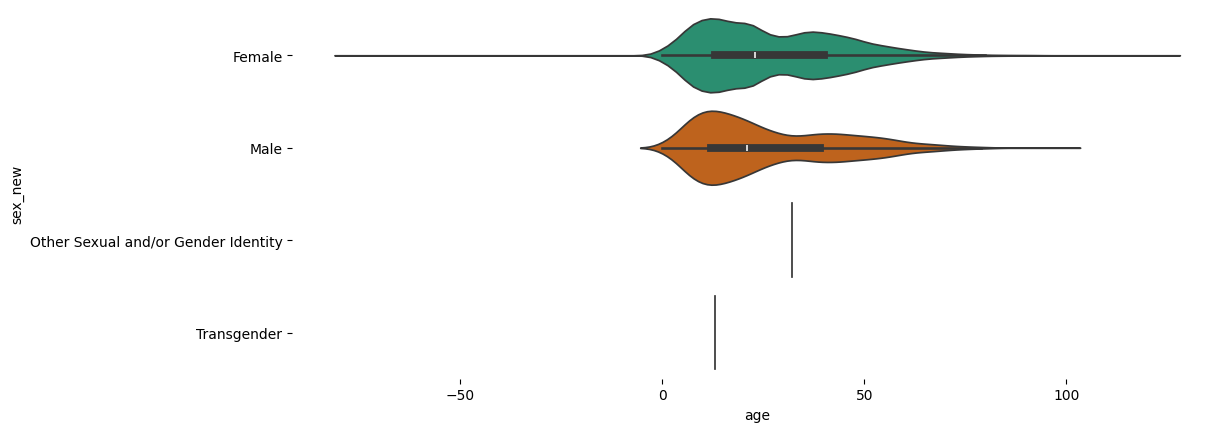

In [769]:
# @title sex_new vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(client_clean['sex_new'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(client_clean, x='age', y='sex_new', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

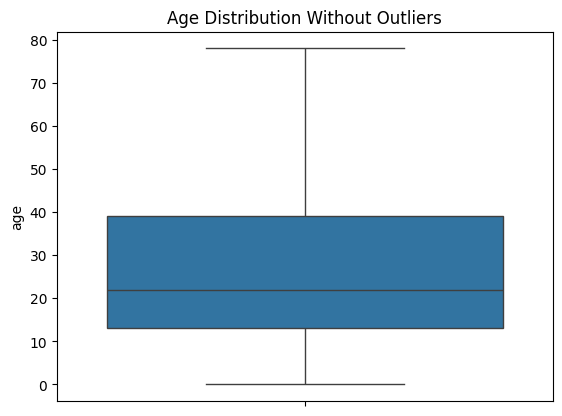

In [770]:
# removing outliers from age column
Q1 = client_clean['age'].quantile(0.25)
Q3 = client_clean['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
client_clean = client_clean[(client_clean['age'] >= lower_bound) & (client_clean['age'] <= upper_bound)]

# You can also replace outliers with the nearest bound if needed
# client_clean.loc[client_clean['age'] < lower_bound, 'age'] = lower_bound
# client_clean.loc[client_clean['age'] > upper_bound, 'age'] = upper_bound

# Visualize the data without outliers
sns.boxplot(data=client_clean, y='age')
plt.title('Age Distribution Without Outliers')
plt.show()


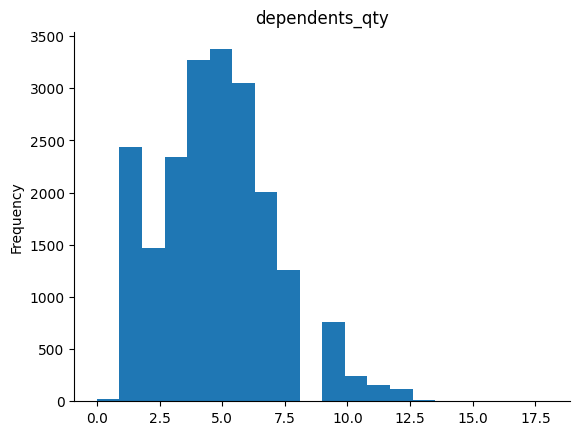

In [771]:
# @title dependents_qty

from matplotlib import pyplot as plt
client_clean['dependents_qty'].plot(kind='hist', bins=20, title='dependents_qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [772]:


# Assuming 'fact_clean' is your DataFrame
fact_clean = fact_clean[fact_clean.quantity != 2]

**FEATURE ENGINEERING**











---





# Block 1: Understanding Your Problem & Data

# Problem Statement:
# We are predicting the demand for food hampers, specifically the number of actual food hamper pickups (`actual_pickup_count`).
# This is a time-series regression problem, where the goal is to forecast the number of hamper pickups based on historical data.

# Key Variables:
# 1. Date variables:
#    - `pickup_date`: The date when the hamper was picked up.
#    - `scheduled_date`: The date when the hamper was scheduled for pickup.
# 2. Client attributes:
#    - `household_size`: Number of members in the client's household.
#    - `dependents`: Number of dependents in the client's household.
#    - `total_pickups`: Total hampers a client has picked up.
# 3. External variables (future enhancement):
#    - Public holidays: Special events like Christmas, Ramadan, etc.




In [773]:
# merging both of the datasets after cleaning
import pandas as pd
merged_df = pd.merge(fact_clean, client_clean, left_on='unique_client', right_on='unique id', how='inner')
merged_df.head()


,datetime_from,pickup_date,pickup_location,quantity,unique_client,unique id_x,address,age,dependents_qty,sex_new,status,unique id_y
0,"Aug 22, 2023 00:00","Aug 22, 2023 10:45",1689345971878x737827531391241900,1,1689345689019x623399745786478600,1692709191987x329098977154433000,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",22.0,1.0,Female,Active,1689345689019x623399745786478600
1,"Sep 7, 2023 03:00","Sep 7, 2023 17:37",1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118961682x600303272380937200,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,Active,1694115474357x134699341188431870
2,"Oct 7, 2023 03:00",NaN,1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118972484x736142859277522000,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,Active,1694115474357x134699341188431870
3,"Nov 7, 2023 04:00","Nov 7, 2023 15:59",1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118974215x566188621317430100,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,Active,1694115474357x134699341188431870
4,"Sep 12, 2023 03:00","Sep 12, 2023 17:39",1689345971878x737827531391241900,1,1694547419532x515953499649605600,1694550833149x439880874521791040,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",32.0,5.0,Female,Active,1694547419532x515953499649605600


In [774]:
# making copy of dataset
merged_clean = merged_df.copy()

In [775]:
merged_clean.isnull().sum()

,0
datetime_from,1
pickup_date,9399
pickup_location,0
quantity,0
unique_client,0
unique id_x,0
address,685
age,0
dependents_qty,107
sex_new,0


In [776]:
# creating new column family_members
# Assuming 'dependent_qty' is a column in your client_clean DataFrame
client_clean['family_members'] = client_clean['dependents_qty'] + 1
client_clean.head()

,address,age,dependents_qty,sex_new,status,unique id,family_members
0,NaN,22.0,1.0,Female,Active,1663970867191x215057012520910850,2.0
1,NaN,22.0,1.0,Female,Active,1663970977536x320239406776320000,2.0
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",22.0,1.0,Male,Active,1667327243288x887165737992192000,2.0
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",22.0,1.0,Female,Active,1667833948363x769349711194751000,2.0
4,NaN,22.0,1.0,Male,Active,1667834247644x935054501347328000,2.0


<ipython-input-777-1b1da309be8c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='quantity', data=day_demand, palette='viridis')


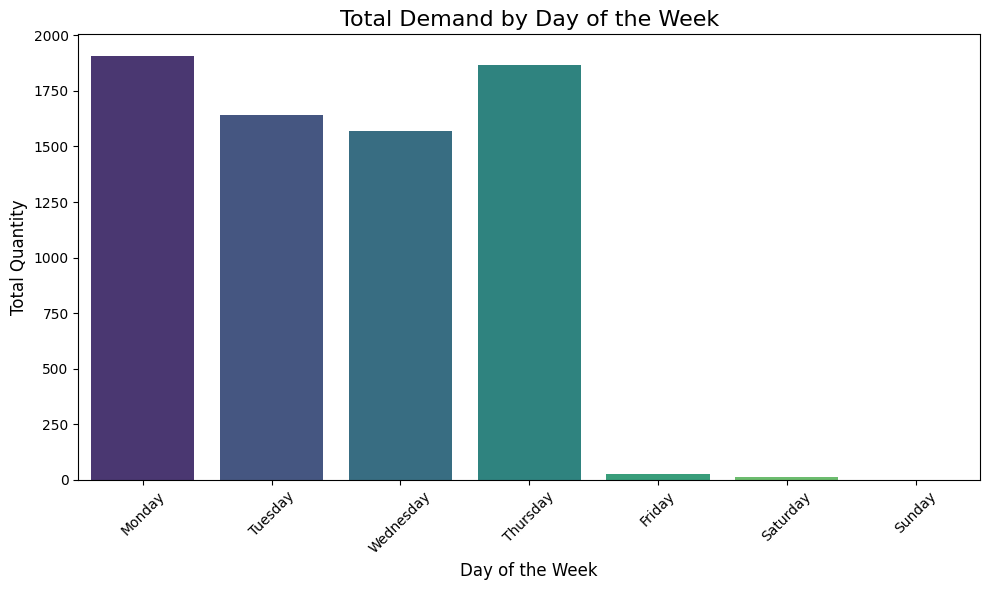

In [777]:
fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date'])
#checking the average pickups on day basis
fact_clean['DayOfWeek'] = fact_clean['pickup_date'].dt.day_name()

#  Group by 'DayOfWeek' and calculate total demand (quantity) for each day
day_demand = fact_clean.groupby('DayOfWeek')['quantity'].sum().reset_index()

#  Sort days in the correct order (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_demand['DayOfWeek'] = pd.Categorical(day_demand['DayOfWeek'], categories=day_order, ordered=True)
day_demand = day_demand.sort_values('DayOfWeek')

#  Create a bar plot to visualize the demand by day
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='quantity', data=day_demand, palette='viridis')
plt.title('Total Demand by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**---As our clients said we don't have actual data before before july 2023 and after august 2024 this garph clearly showing us the pickup data**

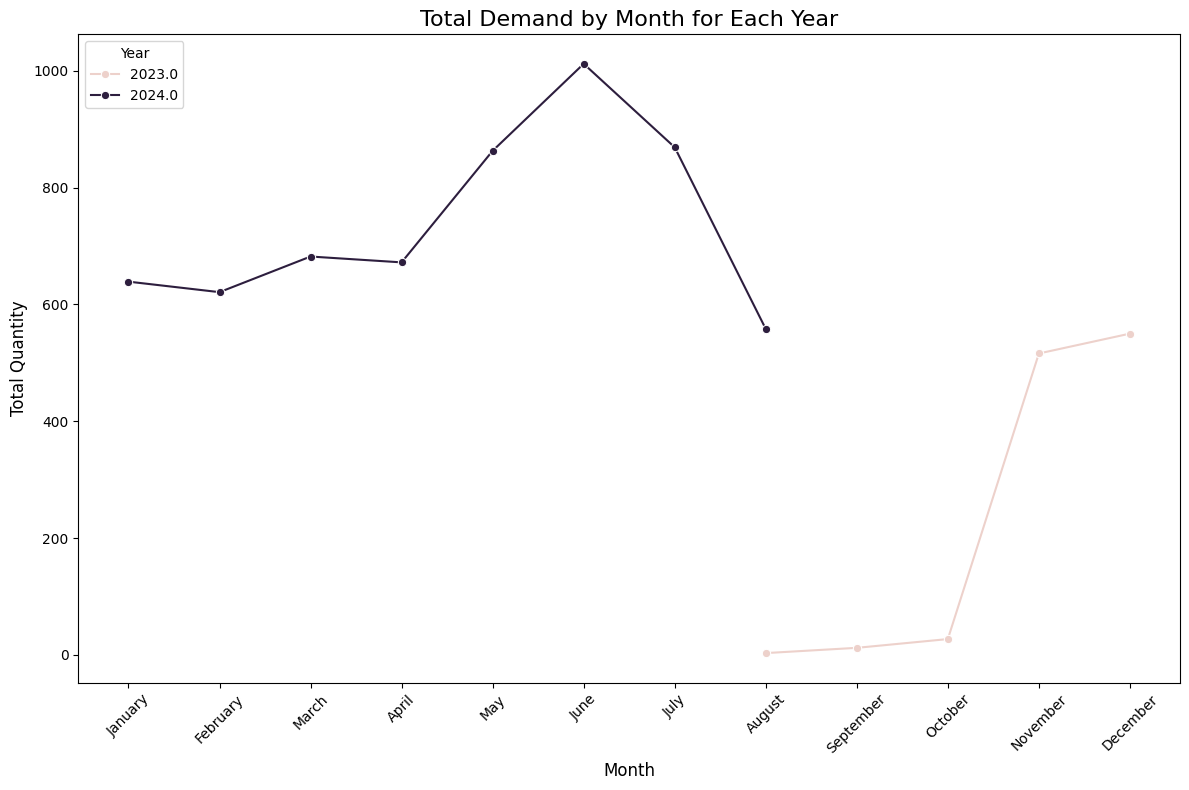

In [778]:
 #checking the pickups on mothly basis(only for those months for which we have data)

fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date'])

#  Extract Year and Month from 'pickup_date'
fact_clean['Year'] = fact_clean['pickup_date'].dt.year
fact_clean['Month'] = fact_clean['pickup_date'].dt.month_name()

#  Group by Year and Month, and calculate total demand (quantity)
month_demand_year = fact_clean.groupby(['Year', 'Month'])['quantity'].sum().reset_index()

#  Sort the Month in the correct order (January to December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_demand_year['Month'] = pd.Categorical(month_demand_year['Month'], categories=month_order, ordered=True)
month_demand_year = month_demand_year.sort_values(['Year', 'Month'])

#  Create a multi-line plot to visualize the demand by month for each year
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='quantity', hue='Year', data=month_demand_year, marker='o')

# Customize the plot
plt.title('Total Demand by Month for Each Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

pickup_date
2024-07-22    143
2024-07-03    140
2024-06-27    122
2024-07-02    112
2024-06-03    110
2024-06-13    107
2024-05-29    104
2024-05-27    104
2024-07-04    104
2024-07-08    100
Name: unique id, dtype: int64


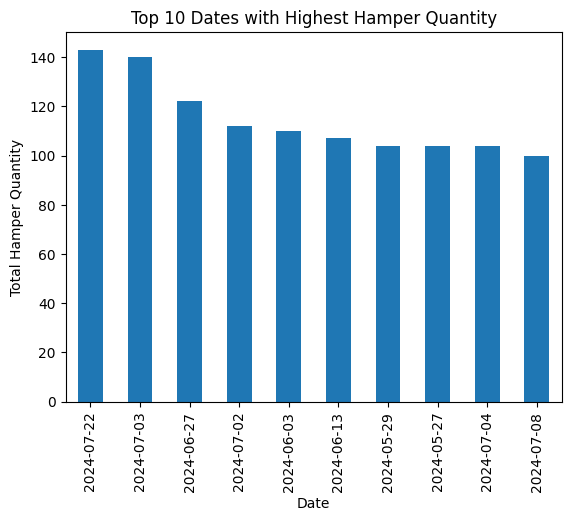

In [779]:
# checking on which days we have highest pickups
fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date'])
# Assuming 'fact_clean' is your DataFrame and 'pickup_date' is the column
fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date']).dt.date
import matplotlib.pyplot as plt
# Group by date and sum the quantity, then sort in descending order
highest_quantity_dates = fact_clean.groupby('pickup_date')['unique id'].count().sort_values(ascending=False)

# Print the top 10 dates with the highest quantity
print(highest_quantity_dates.head(10))

# You can also plot this to visualize it better
highest_quantity_dates.head(10).plot(kind='bar')
plt.title('Top 10 Dates with Highest Hamper Quantity')
plt.xlabel('Date')
plt.ylabel('Total Hamper Quantity')
plt.show()


In [780]:
# Convert 'pickup_date' to datetime if it's not already
fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date'])

# Filter the DataFrame for the date range of interest
date_start = pd.to_datetime('2023-12-18')
date_end = pd.to_datetime('2023-12-31')

fact_filtered = fact_clean[(fact_clean['pickup_date'] >= date_start) & (fact_clean['pickup_date'] <= date_end)].copy()


# Step 1: Create a function to calculate the sum of quantity within a given window
def sum_quantity_window(row, df, window_days):
  """Calculates the sum of 'quantity' within a given window (in days) around the 'pickup_date'."""
  start_date = row['pickup_date'] - pd.Timedelta(days=window_days)
  end_date = row['pickup_date'] + pd.Timedelta(days=window_days)

  return df[(df['pickup_date'] >= start_date) & (df['pickup_date'] <= end_date) & (df['pickup_date'] != row['pickup_date'])]['quantity'].sum()


# Step 2: Apply the function to create new columns for prior and next 7 days
fact_filtered['Prior_7_Days_Sum'] = fact_filtered.apply(lambda row: sum_quantity_window(row, fact_filtered, 7), axis=1)
fact_filtered['Next_7_Days_Sum'] = fact_filtered.apply(lambda row: sum_quantity_window(row, fact_filtered, 7), axis=1)

# Step 3: Print the counts and sums
print("Pickups and Quantity Sums around December 25, 2023:")
print(fact_filtered[['pickup_date', 'quantity', 'Prior_7_Days_Sum', 'Next_7_Days_Sum']])

# Optional: Calculate total pickups and total quantity within the filtered range
total_pickups = len(fact_filtered)
total_quantity = fact_filtered['quantity'].sum()
print(f"\nTotal Pickups: {total_pickups}")
print(f"Total Quantity: {total_quantity}")

Pickups and Quantity Sums around December 25, 2023:
     pickup_date  quantity  Prior_7_Days_Sum  Next_7_Days_Sum
61    2023-12-18         1               104              104
101   2023-12-19         1               115              115
196   2023-12-27         1               113              113
209   2023-12-27         1               113              113
570   2023-12-27         1               113              113
...          ...       ...               ...              ...
5369  2023-12-28         1                98               98
5372  2023-12-28         1                98               98
5391  2023-12-28         1                98               98
5392  2023-12-28         1                98               98
5405  2023-12-28         1                98               98

[264 rows x 4 columns]

Total Pickups: 264
Total Quantity: 264


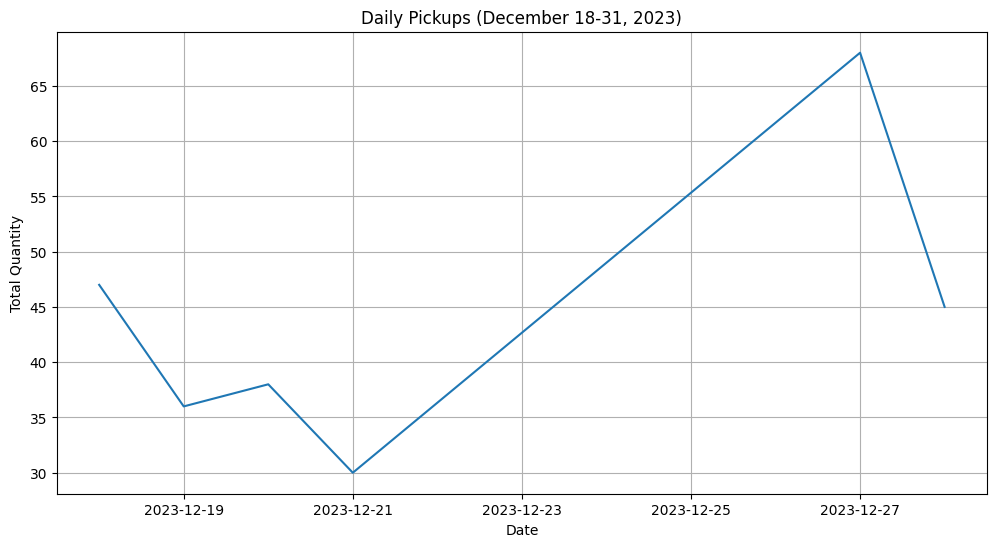

In [781]:


# Convert 'pickup_date' to datetime if it's not already
fact_clean['pickup_date'] = pd.to_datetime(fact_clean['pickup_date'])

# Filter the DataFrame for the date range of interest
date_start = pd.to_datetime('2023-12-18')
date_end = pd.to_datetime('2023-12-31')

fact_filtered = fact_clean[(fact_clean['pickup_date'] >= date_start) & (fact_clean['pickup_date'] <= date_end)]

# Group by date and count the number of pickups
daily_pickups = fact_filtered.groupby('pickup_date')['quantity'].sum()

# Plot the daily pickups for the specified timeframe
plt.figure(figsize=(12, 6))
plt.plot(daily_pickups.index, daily_pickups.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Daily Pickups (December 18-31, 2023)')
plt.grid(True)
plt.show()

In [782]:
#  Create special occasion flags
special_dates = {
    "christmas": pd.Timestamp("2023-12-25"),
    "ramadan": pd.Timestamp("2023-04-10")
}
# Convert 'pickup_date' to datetime if it's not already
merged_clean['pickup_date'] = pd.to_datetime(merged_clean['pickup_date'])
merged_clean['is_christmas'] = merged_clean['pickup_date'].apply(lambda x: 1 if x.month == 12 and x.day == 25 else 0)
merged_clean['is_ramadan'] = merged_clean['pickup_date'].apply(lambda x: 1 if x >= special_dates['ramadan'] and x <= (special_dates['ramadan'] + pd.Timedelta(days=30)) else 0)

In [783]:

# Calculate the number of pickups on Christmas and Ramadan
christmas_pickups = merged_clean[merged_clean['is_christmas'] == 1]['unique_client'].count()
ramadan_pickups = merged_clean[merged_clean['is_ramadan'] == 1]['unique_client'].count()

print(f"Number of pickups on Christmas: {christmas_pickups}")
print(f"Number of pickups on Ramadan: {ramadan_pickups}")

Number of pickups on Christmas: 0
Number of pickups on Ramadan: 0


In [784]:
# checking the behaviour of client by counting the past pickups

# Group by 'unique_client' (client ID) and count the number of pickups for each client
pickups_by_client = fact_clean.groupby('unique_client')['unique id'].count()

# Print the result
print(pickups_by_client)

unique_client
1669658091582x874637848970788900    13
1673043106565x702758294392930300    15
1686780032991x462370984017264640    25
1689345689019x623399745786478600    15
1694115474357x134699341188431870    16
                                    ..
1724182227926x323853251659694100    12
1724273888788x416608885384937500     1
1724356305986x197116693455044600    13
1724359038871x136969019503149060     6
1724441761751x379664611190243300     6
Name: unique id, Length: 1051, dtype: int64


In [785]:

# Find the client with the highest number of pickups
highest_pickups_client_id = pickups_by_client.idxmax()
highest_pickups_count = pickups_by_client.max()

# Find the client with the lowest number of pickups
lowest_pickups_client_id = pickups_by_client.idxmin()
lowest_pickups_count = pickups_by_client.min()

print(f"Client with highest pickups: ID {highest_pickups_client_id}, Count: {highest_pickups_count}")
print(f"Client with lowest pickups: ID {lowest_pickups_client_id}, Count: {lowest_pickups_count}")

Client with highest pickups: ID 1696013590859x172792487259963780, Count: 30
Client with lowest pickups: ID 1696013575591x992017097454009500, Count: 1


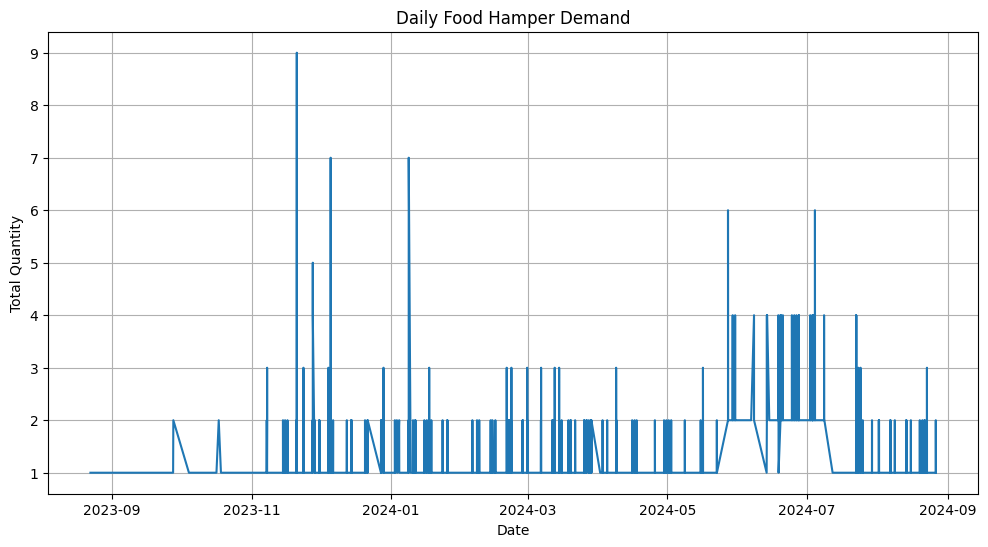

In [786]:
# prompt: convert merged

# Assuming you have a DataFrame named 'merged_df' containing the merged data

# Convert 'pickup_date' to datetime objects if they are not already
merged_df['pickup_date'] = pd.to_datetime(merged_df['pickup_date'])

# Group by 'pickup_date' and calculate the total quantity (demand) for each date
daily_demand = merged_df.groupby('pickup_date')['quantity'].sum()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_demand.index, daily_demand.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Daily Food Hamper Demand')
plt.grid(True)
plt.show()

In [787]:
# Assuming 'fact_clean' DataFrame and 'pickup_date' column exist as shown in the provided code.


merged_clean['pickup_date'] = pd.to_datetime(merged_clean['pickup_date']).dt.date

# Create a new DataFrame with unique addresses and IDs, and their counts
df = merged_clean.groupby(['pickup_date']).size().reset_index(name='record_count')

print(df)



    pickup_date  record_count
0    2023-08-22             1
1    2023-09-07             1
2    2023-09-12             1
3    2023-09-13             1
4    2023-09-25             4
..          ...           ...
176  2024-08-20            38
177  2024-08-21            29
178  2024-08-22            51
179  2024-08-23             4
180  2024-08-26            24

[181 rows x 2 columns]


In [788]:
# Ensure pickup_date is in datetime format if not already
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

# Sort by 'pickup_date' to ensure proper rolling calculations
df = df.sort_values(by='pickup_date')

# Create lagged rolling sum columns for the past 7, 14, and 30 days of total pickups
df['Demand_Lag7'] = df['record_count'].shift(1).rolling(window=7).sum()
df['Demand_Lag14'] = df['record_count'].shift(1).rolling(window=14).sum()
df['Demand_Lag30'] = df['record_count'].shift(1).rolling(window=30).sum()

In [789]:

# Assuming 'merged_clean' is your DataFrame
print("Unique values in Demand_Lag7:")
print(df['Demand_Lag7'].unique())

print("\nUnique values in Demand_Lag14:")
print(df['Demand_Lag14'].unique())



Unique values in Demand_Lag7:
[ nan  13.  16.  19.  23.  21.  24.  25.  37.  50.  60.  64.  80. 138.
 162. 174. 205. 208. 227. 244. 266. 277. 280. 273. 305. 321. 314. 263.
 258. 256. 235. 231. 237. 240. 246. 245. 284. 309. 302. 288. 290. 254.
 299. 262. 234. 217. 243. 204. 198. 189. 206. 221. 239. 228. 192. 233.
 260. 282. 304. 223. 232. 215. 187. 207. 229. 190. 191. 248. 261. 295.
 271. 296. 200. 255. 252. 275. 267. 211. 283. 287. 291. 297. 222. 259.
 251. 306. 317. 315. 308. 312. 270. 265. 241. 225. 268. 356. 407. 476.
 509. 460. 525. 548. 498. 490. 398. 425. 402. 420. 442. 496. 461. 579.
 604. 676. 704. 710. 647. 580. 463. 354. 355. 269. 307. 358. 381. 298.
 322. 311. 279. 278.]

Unique values in Demand_Lag14:
[  nan   38.   53.   69.   83.   85.  104.  163.  187.  211.  255.  268.
  291.  324.  404.  439.  454.  478.  513.  548.  558.  529.  535.  536.
  508.  554.  509.  503.  540.  544.  533.  525.  530.  500.  546.  523.
  507.  497.  436.  443.  432.  424.  423.  480.  425.  41

In [790]:
print("\nUnique values in Demand_Lag30:")
print(df['Demand_Lag30'].unique())


Unique values in Demand_Lag30:
[  nan  509.  549.  598.  638.  670.  697.  724.  752.  771.  813.  856.
  887.  922.  945. 1011. 1055. 1078. 1094. 1117. 1112. 1164. 1135. 1128.
 1138. 1124. 1126. 1043. 1059. 1056. 1040. 1027. 1044. 1031. 1019. 1009.
 1035. 1033. 1013.  999. 1024.  995. 1001.  993. 1015.  978. 1002.  962.
  965.  974.  967.  968.  988.  981.  994. 1039. 1057. 1038. 1047. 1028.
 1032. 1050. 1029. 1034. 1042. 1036. 1017.  963. 1020. 1022. 1087. 1051.
 1092. 1067. 1096. 1090. 1082. 1119. 1095. 1118. 1147. 1121. 1153. 1151.
 1156. 1154. 1229. 1276. 1354. 1393. 1394. 1446. 1491. 1475. 1483. 1465.
 1528. 1565. 1592. 1647. 1703. 1702. 1738. 1801. 1852. 1953. 2043. 2101.
 2079. 2053. 2023. 1981. 2071. 2083. 2095. 2030. 2004. 1928. 1870. 1909.
 1880. 1851. 1843. 1772. 1809. 1735. 1762. 1712. 1696. 1658. 1593. 1580.
 1514.]


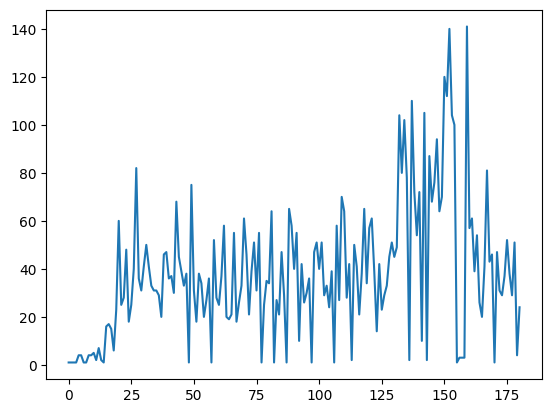

In [791]:
plt.plot(df['record_count'])

In [792]:


# Convert merged_clean to CSV
merged_clean.to_csv('merged_cleaned.csv', index=False)

# Convert df to CSV
df.to_csv('df.csv', index=False)

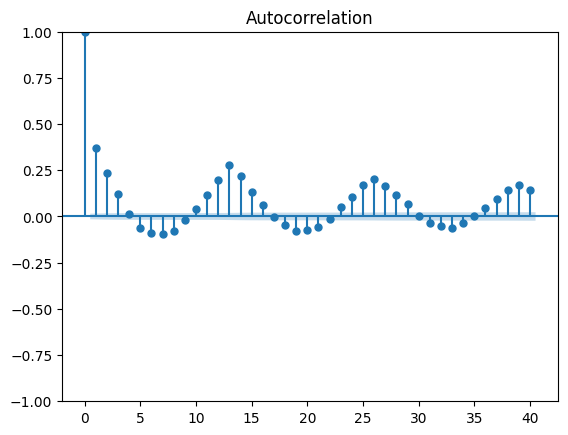

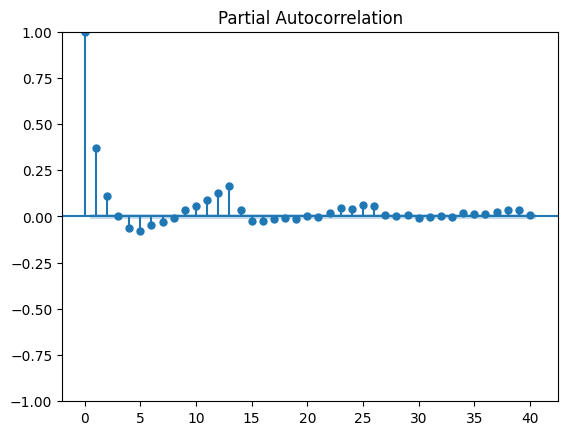

In [793]:
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'pickup_date' to a numerical representation suitable for Box-Cox
# Here, we'll use the timestamp (number of seconds since the Unix epoch)
# Convert datetime.date to datetime objects if needed
merged_clean['pickup_date'] = pd.to_datetime(merged_clean['pickup_date'])
merged_clean['pickup_date_numeric'] = merged_clean['pickup_date'].astype('int64') // 10**9

# Shift data to be positive if it contains zeros or negative values
min_value = merged_clean['pickup_date_numeric'].min()
if min_value <= 0:
    merged_clean['pickup_date_numeric'] = merged_clean['pickup_date_numeric'] - min_value + 1  # Shift by min_value + 1 to make all values positive

# Apply Box-Cox transformation if variance is not stable
merged_clean['actual_pickup_boxcox'], lam = boxcox(merged_clean['pickup_date_numeric'].dropna())  # Apply transformation to the numerical representation
merged_clean['rolling_std_original'] = merged_clean['pickup_date_numeric'].rolling(window=30).std()
merged_clean['rolling_std_boxcox'] = merged_clean['actual_pickup_boxcox'].rolling(window=30).std()

# Plot ACF and PACF to determine optimal lags
# Use the numerical representation for plotting
plot_acf(merged_clean['pickup_date_numeric'].dropna(), lags=40)
plot_pacf(merged_clean['pickup_date_numeric'].dropna(), lags=40)
plt.show()

        date  actual_pickup  scheduled_pickup
0 2023-11-01             16                15
1 2023-11-02              0                 1
2 2023-11-03              0                 0
3 2023-11-04              0                 1
4 2023-11-05              0                 0


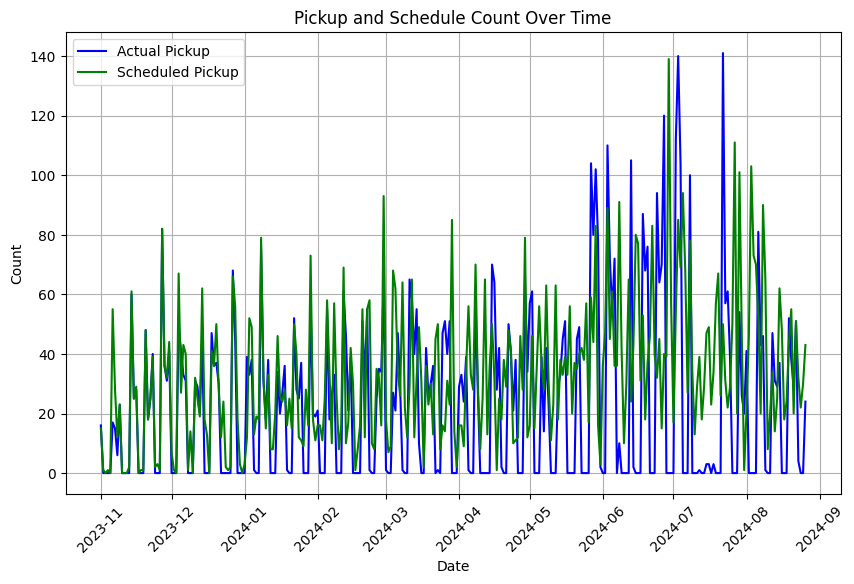

In [794]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Step 2: Convert 'pickup_date' and 'schedule_date' columns to datetime
merged_clean['pickup_date'] = pd.to_datetime(merged_clean['pickup_date'])
merged_clean['datetime_from'] = pd.to_datetime(merged_clean['datetime_from'])

# Step 3: Create time series based on the 'pickup_date' and 'schedule_date' columns
# Count the number of events for each date in both pickup_date and schedule_date
pickup_series = merged_clean.groupby(merged_clean['pickup_date'].dt.date).size().rename('actual_pickup')
schedule_series = merged_clean.groupby(merged_clean['datetime_from'].dt.date).size().rename('scheduled_pickup')

# Step 4: Define the time range for prediction
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-26')
prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Step 5: Reindex the time series to the full date range and fill missing values with 0
pickup_series = pickup_series.reindex(prediction_dates, fill_value=0)
schedule_series = schedule_series.reindex(prediction_dates, fill_value=0)

# Step 6: Combine the two series into one DataFrame, using the date as the index
merged_time_series = pd.DataFrame({
    'date': prediction_dates,
    'actual_pickup': pickup_series.values,
    'scheduled_pickup': schedule_series.values
})

# Display the merged time series
print(merged_time_series.head())

# Step 7: Plot the merged time series (optional)

# Plot Pickup Count and Schedule Count Over Time
plt.figure(figsize=(10, 6))
plt.plot(merged_time_series['date'], merged_time_series['actual_pickup'], label='Actual Pickup', color='blue')
plt.plot(merged_time_series['date'], merged_time_series['scheduled_pickup'], label='Scheduled Pickup', color='green')
plt.title('Pickup and Schedule Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Non-numeric columns: Index(['datetime_from', 'pickup_date', 'pickup_location', 'unique_client',
       'unique id_x', 'address', 'sex_new', 'status', 'unique id_y'],
      dtype='object')


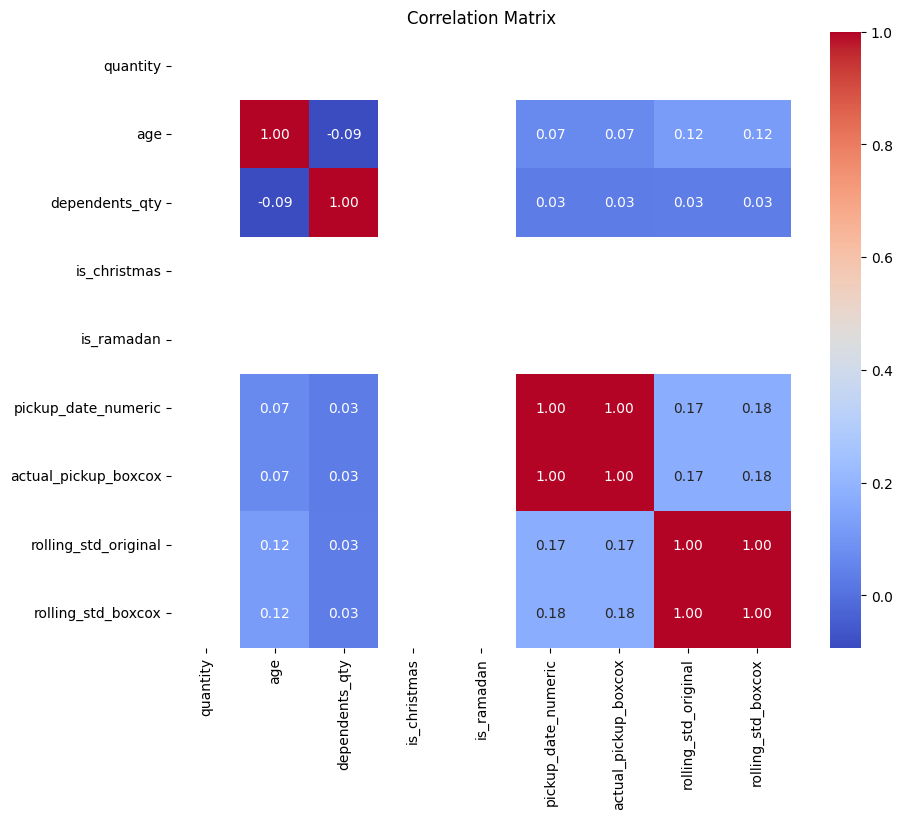

In [795]:
# corelation between features
# Check for non-numeric columns
non_numeric_cols = merged_clean.select_dtypes(exclude=['float64', 'int64']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns for the correlation analysis
numeric_df = merged_clean.drop(columns=non_numeric_cols)

# Now we can calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
merged_clean['log_quantity'] = np.log1p(merged_clean['quantity'])




In [796]:
# Coordinates for Edmonton, Alberta, Canada
distribution_center_lat = 53.5461
distribution_center_lon = -113.4938

# Import geodesic from geopy to calculate the distance
from geopy.distance import geodesic

# Function to calculate the distance between the client and the Edmonton distribution center
def calculate_distance(row):
    client_coords = (row['latitude'], row['longitude'])  # Ensure your dataframe has latitude and longitude columns
    center_coords = (distribution_center_lat, distribution_center_lon)
    return geodesic(client_coords, center_coords).kilometers

# Apply the distance calculation (assuming 'latitude' and 'longitude' columns exist in the dataframe)
if 'latitude' in merged_clean.columns and 'longitude' in merged_clean.columns:
    merged_clean['distance_to_edmonton_center'] = merged_clean.apply(calculate_distance, axis=1)


In [797]:
# creating new columns from address and pickup_location
# factors might offer insights, especially if certain regions have distinct demand patterns


def extract_city_state(address):
  """
  This function tries to extract city and state from an address string.
  It's a basic example and might need more robust logic for better accuracy.
  """
  try:
    parts = address.split(',')
    if len(parts) >= 2:
      city = parts[-2].strip()
      state = parts[-1].strip()
      return city, state
    else:
      return None, None
  except:
    return None, None


merged_clean[['city_from_address', 'state_from_address']] = merged_clean['address'].apply(lambda x: pd.Series(extract_city_state(x)))

# Do the same for pickups_location
merged_clean[['city_from_pickups', 'state_from_pickups']] = merged_clean['pickup_location'].apply(lambda x: pd.Series(extract_city_state(x)))

merged_clean.head()

,datetime_from,pickup_date,pickup_location,quantity,unique_client,unique id_x,address,age,dependents_qty,sex_new,...,is_ramadan,pickup_date_numeric,actual_pickup_boxcox,rolling_std_original,rolling_std_boxcox,log_quantity,city_from_address,state_from_address,city_from_pickups,state_from_pickups
0,2023-08-22 00:00:00,2023-08-22,1689345971878x737827531391241900,1,1689345689019x623399745786478600,1692709191987x329098977154433000,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",22.0,1.0,Female,...,0,10916034438,15.197078,NaN,NaN,0.693147,AB T5H 2Z8,Canada,None,None
1,2023-09-07 03:00:00,2023-09-07,1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118961682x600303272380937200,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,...,0,10917416838,15.197129,NaN,NaN,0.693147,AB T5C 1E8,Canada,None,None
2,2023-10-07 03:00:00,NaT,1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118972484x736142859277522000,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,...,0,1,0.000000,NaN,NaN,0.693147,AB T5C 1E8,Canada,None,None
3,2023-11-07 04:00:00,2023-11-07,1689345971878x737827531391241900,1,1694115474357x134699341188431870,1694118974215x566188621317430100,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",36.0,6.0,Female,...,0,10922687238,15.197324,NaN,NaN,0.693147,AB T5C 1E8,Canada,None,None
4,2023-09-12 03:00:00,2023-09-12,1689345971878x737827531391241900,1,1694547419532x515953499649605600,1694550833149x439880874521791040,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",32.0,5.0,Female,...,0,10917848838,15.197145,NaN,NaN,0.693147,AB T6W 0G6,Canada,None,None


In [798]:
# prompt: REname column name city_from

merged_clean = merged_clean.rename(columns={'city_from_address': 'POSTAL_CODE'})

In [799]:


# Group by neighborhood/region and calculate summary statistics
neighborhood_demand = merged_clean.groupby(['POSTAL_CODE', 'state_from_address'])['quantity'].agg(['sum', 'mean', 'count'])

# Rename columns for clarity
neighborhood_demand = neighborhood_demand.rename(columns={'sum': 'Total Quantity', 'mean': 'Average Quantity', 'count': 'Number of Pickups'})

# Print the results
print(neighborhood_demand)






                                Total Quantity  Average Quantity  \
POSTAL_CODE state_from_address                                     
AB          Canada                         146               1.0   
AB T4N 6W9  Canada                          16               1.0   
AB T4V 2Y1  Canada                          14               1.0   
AB T4X      Canada                          27               1.0   
AB T5A      Canada                          74               1.0   
...                                        ...               ...   
AB T6X 1M4  Canada                          12               1.0   
AB T6X 1N6  Canada                          14               1.0   
AB T6X 1V3  Canada                          40               1.0   
AB T6X 2N3  Canada                          15               1.0   
Alberta     Canada                           3               1.0   

                                Number of Pickups  
POSTAL_CODE state_from_address                     
AB         

In [800]:
# # prompt: download merged_clean dataste as csv

# from google.colab import files

# # Assuming 'merged_clean' is your DataFrame
# merged_clean.to_csv('merged_clean.csv', encoding='utf-8')
# files.download('merged_clean.csv')

In [801]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [802]:
import pandas as pd

# Assuming 'pickup_date' is a datetime column and you want to calculate the rolling standard deviation of 'actual_pickup_boxcox'
merged_clean['rolling_std_original'] = merged_clean['actual_pickup_boxcox'].rolling(window=30).std()
# Changed to calculate the std of 'actual_pickup_boxcox' over a rolling window of 30

merged_clean['rolling_std_boxcox'] = merged_clean['actual_pickup_boxcox'].rolling(window=30).std()
# This line was already correct, but retained for consistency

In [803]:
import pandas as pd

# Try reading the file with 'error_bad_lines=False' to skip problematic lines
edmonton = pd.read_csv('/content/Edmonton_postal_code.csv')

# Print some info to check if the issue is resolved
edmonton.head()

,POSTAL_CODE,CITY,PROVINCE_ABBR,TIME_ZONE,LATITUDE,LONGITUDE
0,T6J 2V4,EDMONTON,AB,7,53.467545,-113.508716
1,T6K 3P9,EDMONTON,AB,7,53.441711,-113.440360
2,T5C 0T6,EDMONTON,AB,7,53.589299,-113.453957
3,T5T 0N5,EDMONTON,AB,7,53.517730,-113.628654
4,T5M 4C5,EDMONTON,AB,7,53.566894,-113.538167


In [804]:

edmonton = edmonton.drop(['PROVINCE_ABBR', 'TIME_ZONE'], axis=1)

In [816]:
import pandas as pd
import folium


# Initialize a map centered around the average location of Edmonton postal codes
edmonton_map = folium.Map(location=[edmonton['LATITUDE'].mean(), edmonton['LONGITUDE'].mean()], zoom_start=11)

# Plot only the first 100 postal codes to reduce load on Colab
for _, row in edmonton.head(100).iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['POSTAL_CODE']
    ).add_to(edmonton_map)

# Display the map
edmonton_map